## Scripts to plot OOI DAS data. 

- Yiyu Ni (niyiyu@uw.edu)
- Feb 9th, 2022
- Dept. of Earth and Space Sciences
- University of Washington

In [6]:
# Uncomment the following two lines to install tqdm. This syntax will allow one to run sermeq.
# Only needs to be run once.

# import sys
# !{sys.executable} -m pip install tqdm

In [7]:
import h5py
import os
from datetime import datetime
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy
path = "/data/data2/south-data-ejm/hdd/South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T16_09_15-0700/"

In [8]:
file = "South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T232714Z.h5"
f = h5py.File(path + file, 'r')
data = f['Acquisition']['Raw[0]']['RawData'][:, :].astype('int64')
timestamp = f['Acquisition']['Raw[0]']['RawDataTime'][:] / 1000000

In [9]:
filt_normdata = np.zeros([47500, 12000])
for i in range(47500):
    filt_normdata[i, :] = (data[i, :] - np.min(data[i, :])) / (np.max(data[i, :]) - np.min(data[i, :]))

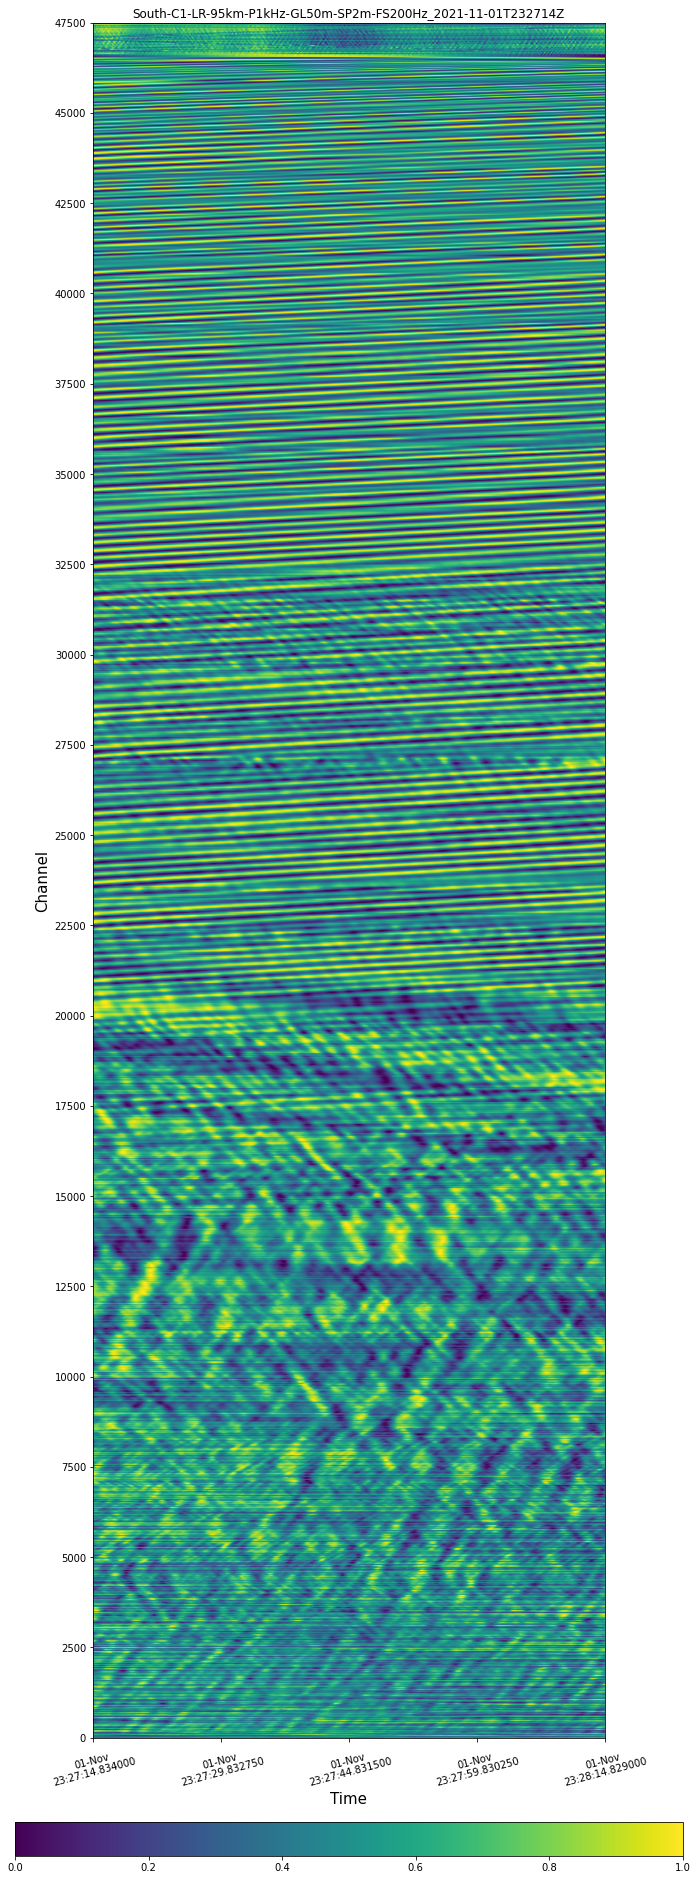

In [16]:
x_lims = list(map(datetime.utcfromtimestamp, [timestamp[0], timestamp[-1]]))
x_lims = mdates.date2num(x_lims)
y_lims = [0, 47500]

downsample_space=10 # At the scale of plotting, the downsampling is imperceptible
downsample_time=10 # At the scale of plotting, the downsampling is imperceptible
fig, ax = plt.subplots(figsize = (10, 30))
fig.patch.set_facecolor('white') # Good for dark themed notebooks
plt.tight_layout()
im = ax.imshow((filt_normdata[::downsample_space,::downsample_time]), 
               extent = [x_lims[0], x_lims[1],  y_lims[0], y_lims[1]], 
               aspect = 1/20405363)
ax.xaxis_date()
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Channel", fontsize = 15)
date_format = mdates.DateFormatter('%d-%b\n%H:%M:%S.%f')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=15)

plt.xticks(np.linspace(x_lims[0], x_lims[1], 5))
plt.yticks(np.linspace(0, 47500, 20))
plt.title(file.split('.')[0])
plt.colorbar(im, ax = ax, location = 'bottom', pad = 0.04)
# plt.savefig("/home/niyiyu/notebooks/OOI-Figure/%s.png" % file.split('.')[0] , 
#            bbox_inches = 'tight')